In [4]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
%cd C:\Users\saigo\Documents\car brand recognition

C:\Users\saigo\Documents\car brand recognition


In [38]:
#resize all the images

IMAGE_SIZE=[224,224]

train_path= r'C:\Users\saigo\Documents\car brand recognition\Train'
valid_path= r'C:\Users\saigo\Documents\car brand recognition\Train'

In [39]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [40]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [41]:
#dont train existing weights
for layer in resnet.layers:
    layer.trainable=False

In [46]:
#useful for getting number of output classes
folders= glob(r'C:\Users\saigo\Documents\car brand recognition\Train\*')

In [47]:
folders

['C:\\Users\\saigo\\Documents\\car brand recognition\\Train\\audi',
 'C:\\Users\\saigo\\Documents\\car brand recognition\\Train\\lamborghini',
 'C:\\Users\\saigo\\Documents\\car brand recognition\\Train\\mercedes']

In [49]:
#flatten
x=Flatten()(resnet.output)

In [51]:
prediction=Dense(len(folders),activation='softmax')(x)

#create a model object
model=Model(inputs=resnet.input,outputs=prediction)

In [52]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [55]:
#cost and optimization method to use

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [59]:
# Use the image data generator to import images from dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
#on test data should't do anything other than rescale dont do image data generator
test_datagen=ImageDataGenerator(rescale=1./255)

In [60]:
#read the images
training_set=train_datagen.flow_from_directory(r'C:\Users\saigo\Documents\car brand recognition\Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 64 images belonging to 3 classes.


In [63]:
#read images from test data
test_set=train_datagen.flow_from_directory(r'C:\Users\saigo\Documents\car brand recognition\Test',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 58 images belonging to 3 classes.


In [64]:
#fit the model
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\saigo\AppData\Local\Temp\ipykernel_13692\3234600558.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/50
2/2 [==============================] - 10s 5s/step - loss: 7.3974 - accuracy: 0.3438 - val_loss: 9.7140 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 6s 4s/step - loss: 6.2808 - accuracy: 0.3125 - val_loss: 2.6894 - val_accuracy: 0.5345
Epoch 3/50
2/2 [==============================] - 6s 4s/step - loss: 3.4274 - accuracy: 0.3750 - val_loss: 1.9150 - val_accuracy: 0.5345
Epoch 4/50
2/2 [==============================] - 6s 4s/step - loss: 1.5564 - accuracy: 0.5156 - val_loss: 3.6862 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 6s 4s/step - loss: 2.8139 - accuracy: 0.3906 - val_loss: 1.7947 - val_accuracy: 0.1897
Epoch 6/50
2/2 [==============================] - 6s 4s/step - loss: 0.8902 - accuracy: 0.6562 - val_loss: 2.2112 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 6s 4s/step - loss: 2.0570 - accuracy: 0.5000 - val_loss: 1.5496 - val_accuracy: 0.5517
Epoch 8/50
2/2 [========================

In [68]:
r.history

{'loss': [7.397448539733887,
  6.280797004699707,
  3.4273602962493896,
  1.5563759803771973,
  2.8139052391052246,
  0.8902021646499634,
  2.0569918155670166,
  1.2335820198059082,
  1.7115581035614014,
  0.8913803100585938,
  1.552126169204712,
  1.0862617492675781,
  0.9093308448791504,
  0.9080231785774231,
  0.8380154967308044,
  0.9092547297477722,
  0.7683993577957153,
  0.788344144821167,
  0.628017783164978,
  0.6363505721092224,
  0.5131455659866333,
  0.5313299298286438,
  0.4418807327747345,
  0.5020621418952942,
  0.4672950506210327,
  0.4152805805206299,
  0.5249546766281128,
  0.32752859592437744,
  0.4392111599445343,
  0.2550930976867676,
  0.4535229802131653,
  0.42825961112976074,
  0.2874973714351654,
  0.33541274070739746,
  0.29320549964904785,
  0.31509703397750854,
  0.26889368891716003,
  0.2534165382385254,
  0.25884902477264404,
  0.2248108983039856,
  0.25654494762420654,
  0.2240309864282608,
  0.25597384572029114,
  0.22506284713745117,
  0.201237410306930

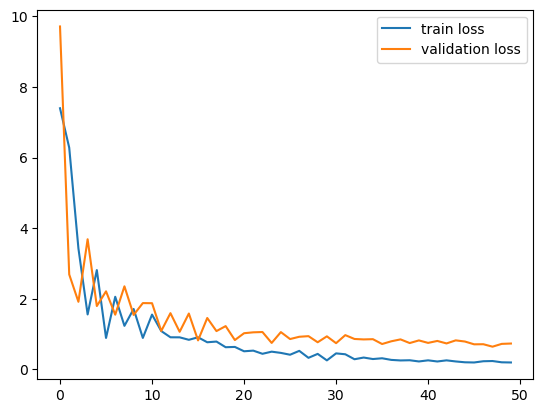

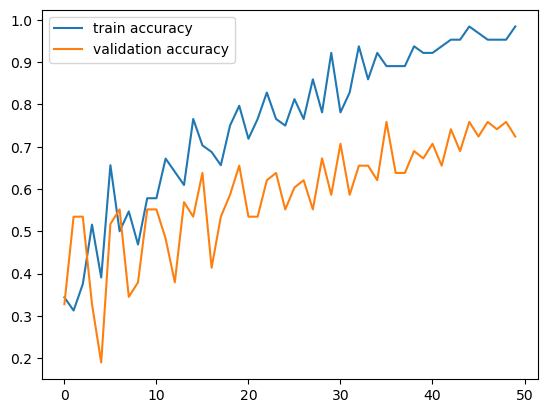

<Figure size 640x480 with 0 Axes>

In [66]:
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
plt.savefig('Lossval_Loss')

#plot the accuracy
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('Accval_acc')

In [70]:
#save the model to h5 file

from keras.models import load_model

model.save('model_resnet50.h5')

In [71]:
#prediction on test data
y_pred=model.predict(test_set)

2/2 [==============================] - 4s 1s/step


In [72]:
y_pred

array([[9.3782550e-01, 3.6137018e-02, 2.6037507e-02],
       [1.4991519e-01, 4.0319750e-01, 4.4688728e-01],
       [1.5138514e-02, 9.0193927e-01, 8.2922161e-02],
       [3.8045157e-02, 2.9927477e-01, 6.6268015e-01],
       [6.8480468e-01, 1.9595047e-02, 2.9560032e-01],
       [1.7113286e-01, 2.6588505e-03, 8.2620835e-01],
       [2.0112038e-01, 6.0072362e-01, 1.9815600e-01],
       [5.9934698e-02, 4.9797228e-01, 4.4209304e-01],
       [3.7587281e-02, 3.3509982e-01, 6.2731290e-01],
       [1.0311802e-02, 9.5000720e-01, 3.9681043e-02],
       [5.6172341e-01, 1.2025231e-01, 3.1802425e-01],
       [7.6668143e-02, 4.6969184e-01, 4.5364001e-01],
       [1.5841672e-01, 6.2101460e-01, 2.2056875e-01],
       [9.5102169e-02, 8.3286214e-01, 7.2035760e-02],
       [2.5771555e-01, 2.6877111e-01, 4.7351339e-01],
       [2.6889460e-02, 8.4214431e-01, 1.3096622e-01],
       [1.3077555e-02, 9.3628973e-01, 5.0632797e-02],
       [3.4814006e-01, 1.8301664e-01, 4.6884328e-01],
       [5.3477269e-02, 5.652

In [73]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [74]:
y_pred

array([0, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1], dtype=int64)

In [79]:
img = image.load_img('C:\\Users\\saigo\\Documents\\car brand recognition\\Test\\lamborghini\\11.jpg', target_size=(224, 224))

In [80]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [82]:
x.shape

(224, 224, 3)

In [83]:
x=x/255

In [84]:
x

array([[[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.76862746, 0.73333335, 0.6745098 ],
        [0.8509804 , 0.8156863 , 0.75686276],
        [0.9529412 , 0.91764706, 0.85882354]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9607843 , 0.9607843 , 0.92941177],
        [0.9529412 , 0.9529412 , 0.92156863],
        [0.9490196 , 0.9490196 , 0.91764706]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.9411765 , 0.9764706 , 0.972549  ],
        [0.9490196 , 0.9843137 , 0.98039216],
        [0.9490196 , 0.9843137 , 0.98039216]],

       ...,

       [[0.7411765 , 0.8117647 , 0.8980392 ],
        [0.74509805, 0.80784315, 0.8980392 ],
        [0.74509805, 0

In [87]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [88]:
model.predict(img_data)

1/1 [==============================] - 1s 1s/step


array([[0.00526781, 0.0057636 , 0.9889686 ]], dtype=float32)

In [89]:
a=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 105ms/step


In [92]:
a==2

array([ True])